In [15]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

D_train = np.column_stack((X_train, y_train))


Cs = np.logspace(-1, 2, 10)
gammas = np.logspace(-1, 1, 10)
repeat = 10
best_score = 0
best_C = 0
best_gamma = 0

mean_scores = [[0]*len(Cs)]*len(gammas)

for i in range(0, len(Cs)-1):
    
    C = Cs[i]
    
    for j in range(0, len(gammas)-1):
        
        gamma = gammas[j]
        clf = svm.SVC(gamma=gamma, C=C)
        cv_scores = [0]*repeat   
        
        D_perm = np.random.permutation(D_train)        
        mean_score = np.mean(cross_val_score(clf, D_perm[:, :-1], D_perm[:, -1], cv=5))
        
        mean_scores[i][j] = mean_score
        if best_score < mean_score:
            best_C = C
            best_gamma = gamma
            best_score = mean_score
            
print("Best score=" + str(best_score) + "; best C=" + str(best_C) + "; best gamma=" + str(best_gamma)) 

clf = svm.SVC(gamma=best_gamma, C=best_C)
clf.fit(X_train, y_train)
print("Test accuracy=" + str(clf.score(X_test, y_test)))

# y_p = clf.predict(X_test)
# print(metrics.classification_report(y_test, y_p))
# print(metrics.confusion_matrix(y_test, y_p))

Best score=0.990909090909; best C=21.5443469003; best gamma=0.1
Test accuracy=0.977777777778


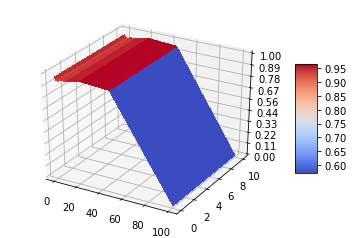

In [16]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')
# Plot the surface.
Cs_grid, gammas_grid = np.meshgrid(Cs, gammas)
surf = ax.plot_surface(Cs_grid, gammas_grid, mean_scores, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0.0, 1.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

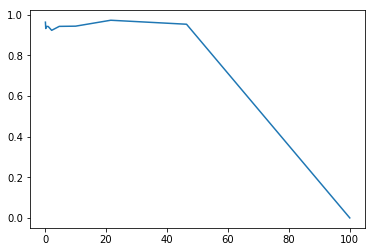

In [17]:
import matplotlib.pyplot as plt
plt.plot(Cs, mean_scores[0])

plt.show()